In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
# load paths 
TRAIN_IMG_PATH = "/Users/anthony/Documents/Comp551_KaggleData/train_images.npy"
TRAIN_LAB_PATH = "/Users/anthony/Documents/Comp551_KaggleData/train_labels.csv"

In [5]:
images = np.load(TRAIN_IMG_PATH, encoding='bytes')
images.shape

(10000, 2)

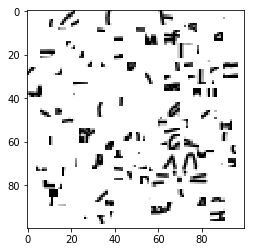

In [139]:
tmpImg = images[5000][1].reshape((100,100)).astype(np.uint8)

plt.imshow(tmpImg, cmap='gray_r')
plt.show()

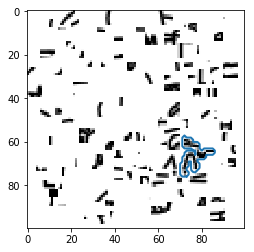

In [140]:
# Try to find contours
from skimage import measure

tmpImg_contours = measure.find_contours(tmpImg, 0.8)

# Display the image and plot all contours found
plt.imshow(tmpImg, cmap='gray_r')

# Find the longest contour
longestCont_i = -1
longestCont_len = 0
for i, contour in enumerate(tmpImg_contours):
    if len(contour) > longestCont_len:
        longestCont_i = i
        longestCont_len = len(contour)
        
# Plot the longest contour
longestCont = tmpImg_contours[longestCont_i]
plt.plot(longestCont[:, 1], longestCont[:, 0], linewidth=2)

plt.show()

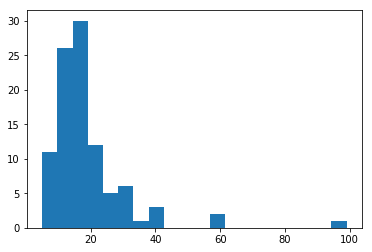

In [141]:
# histogram of contours to find potentially noise

contour_lengths = np.zeros(len(tmpImg_contours))

for i, contour in enumerate(tmpImg_contours):
    contour_lengths[i] = float(len(contour))

plt.hist(contour_lengths, bins=20)
plt.show()

In [127]:
### NOTE: this is bad for noise-only images (see index 5000)

## maybe try shrining the black edges then do contours?

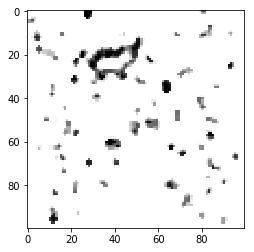

In [77]:
# Use some sort of naive filter (deprecated)
from skimage import filters

med_filter_tmpImg = filters.median(tmpImg, np.ones((3, 3)))

plt.imshow(med_filter_tmpImg, cmap='gray_r')
plt.show()